In [1]:
# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the four datasets
avocado = pd.read_csv("datasets/avocado.csv")
homelessness = pd.read_csv("datasets/homelessness.csv")
temperatures = pd.read_csv("datasets/temperatures.csv")
walmart = pd.read_csv("datasets/walmart.csv")

In [2]:
# Add your code snippets here
# Mean and meadian
print(walmart.head())
print(walmart.info())
print(walmart.weekly_sales.mean())
print(walmart.weekly_sales)

   store type  department        date  weekly_sales  is_holiday  \
0      1    A           1  2010-02-05      24924.50       False   
1      1    A           1  2010-03-05      21827.90       False   
2      1    A           1  2010-04-02      57258.43       False   
3      1    A           1  2010-05-07      17413.94       False   
4      1    A           1  2010-06-04      17558.09       False   

   temperature_c  fuel_price_usd_per_l  unemployment  
0       5.727778              0.679451         8.106  
1       8.055556              0.693452         8.106  
2      16.816667              0.718284         7.808  
3      22.527778              0.748928         7.808  
4      27.050000              0.714586         7.808  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store                 10774 non-null  int64  
 1   t

In [3]:
# min max
print(walmart.date.max())
print(walmart.date.min())

2012-10-26
2010-02-05


# summarize your data
## .agg() => allows you to apply your own custom functions to a DataFrame,as well as apply functions to  more than one column.
## df['column'].agg(function)
## IQR function => inter-quartile range function => 75th percentile - 25th percentile.



In [4]:
# a custom IQR function
def iqr(column):
    return column.quantile(0.75)  - column.quantile(0.25)

print(walmart['temperature_c'].agg(iqr))
print(walmart[["temperature_c",'fuel_price_usd_per_l','unemployment']].agg(iqr))


16.583333333333336
temperature_c           16.583333
fuel_price_usd_per_l     0.073176
unemployment             0.565000
dtype: float64


In [5]:
# pass a list[] of functions without parentheses wo .agg()
print(walmart[["temperature_c",'fuel_price_usd_per_l','unemployment']].agg([iqr, np.median]))

        temperature_c  fuel_price_usd_per_l  unemployment
iqr         16.583333              0.073176         0.565
median      16.966667              0.743381         8.099


In [6]:
# sort by date
walmart.sort_values("date") 

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
6437,19,A,13,2010-02-05,38597.52,False,-6.133333,0.780365,8.350
1249,2,A,31,2010-02-05,3840.21,False,4.550000,0.679451,8.324
6449,19,A,14,2010-02-05,17590.59,False,-6.133333,0.780365,8.350
6461,19,A,16,2010-02-05,4929.87,False,-6.133333,0.780365,8.350
...,...,...,...,...,...,...,...,...,...
3592,6,A,99,2012-10-05,440.00,False,21.577778,0.955511,5.329
8108,20,A,99,2012-10-05,660.00,False,15.983333,1.052726,7.293
10773,39,A,99,2012-10-05,915.00,False,22.250000,0.955511,6.228
6257,14,A,96,2012-10-12,3.00,False,12.483333,1.056689,8.667


In [7]:
# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
walmart['cum_weekly_sales'] = walmart.weekly_sales.cumsum()

# Get the cumulative maximum of weekly_sales, add add it as a column called cum_max_sales
walmart['cum_max_sales'] =walmart.weekly_sales.cummax()

# See the columns 
print(walmart[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])


             date  weekly_sales  cum_weekly_sales  cum_max_sales
0      2010-02-05      24924.50      2.492450e+04       24924.50
1      2010-03-05      21827.90      4.675240e+04       24924.50
2      2010-04-02      57258.43      1.040108e+05       57258.43
3      2010-05-07      17413.94      1.214248e+05       57258.43
4      2010-06-04      17558.09      1.389829e+05       57258.43
...           ...           ...               ...            ...
10769  2011-12-09        895.00      2.568930e+08      293966.05
10770  2012-02-03        350.00      2.568934e+08      293966.05
10771  2012-06-08        450.00      2.568938e+08      293966.05
10772  2012-07-13          0.06      2.568938e+08      293966.05
10773  2012-10-05        915.00      2.568947e+08      293966.05

[10774 rows x 4 columns]


# Counting 

## .drop_duplicates(subset="name") => Return DataFrame with duplicate rows removed

## .drop_duplicates(subset=['a', 'b']) => drop duplicate pairs

## DataFrame.value_counts(sort=True, normalize=True) => normalize: return proportions rather than frequencies.


## dropping duplicates

In [8]:
# Drop duplicate store/type combinations
store_types = walmart.drop_duplicates(subset=["store", "type"])
print(store_types.head())

# Drop duplicate store/department combinations
store_depts = walmart.drop_duplicates(subset=["store", "department"])
print(store_depts.head())

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = walmart[walmart["is_holiday"]==True].drop_duplicates(subset="date")

print(holiday_dates["date"])

      store type  department        date  weekly_sales  is_holiday  \
0         1    A           1  2010-02-05      24924.50       False   
901       2    A           1  2010-02-05      35034.06       False   
1798      4    A           1  2010-02-05      38724.42       False   
2699      6    A           1  2010-02-05      25619.00       False   
3593     10    B           1  2010-02-05      40212.84       False   

      temperature_c  fuel_price_usd_per_l  unemployment  cum_weekly_sales  \
0          5.727778              0.679451         8.106          24924.50   
901        4.550000              0.679451         8.324       18863178.61   
1798       6.533333              0.686319         8.623       42653008.31   
2699       4.683333              0.679451         7.259       66180317.34   
3593      12.411111              0.782478         9.765       85470611.89   

      cum_max_sales  
0          24924.50  
901       140504.41  
1798      178982.89  
2699      178982.89  
3593  

## Counting categorial variables

In [9]:
# Count the number of stores of each type
store_counts = store_types.type.value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props = store_types.type.value_counts(normalize=True)
print(store_props)

# Count the number of each department number and sort
dept_counts_sorted = store_depts.department.value_counts(sort=True)
print(dept_counts_sorted)

# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts.department.value_counts(sort=True, normalize=True)
print(dept_props_sorted)

A    11
B     1
Name: type, dtype: int64
A    0.916667
B    0.083333
Name: type, dtype: float64
1     12
55    12
72    12
71    12
67    12
      ..
37    10
48     8
50     6
39     4
43     2
Name: department, Length: 80, dtype: int64
1     0.012917
55    0.012917
72    0.012917
71    0.012917
67    0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: department, Length: 80, dtype: float64


# Grouped summary statistics

## .groupby()
## .groupby().agg([fun1, fun2...])
## .groupby([a1, a2])[b].mean()

In [10]:
walmart.type.value_counts()
# Walmart distinguishes three types of stores: "supercenters," "discount stores," and "neighborhood markets," encoded in this dataset as type "A," "B," and "C". 

A    9872
B     902
Name: type, dtype: int64

In [11]:
# calculate without groupby
# Calc total weekly sales
walmart_all = walmart["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
walmart_A = walmart[walmart["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
walmart_B = walmart[walmart["type"]=="B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
walmart_C = walmart[walmart["type"]=="C"]["weekly_sales"].sum()

# Get proportion for each type
walmart_propn_by_type = [walmart_A, walmart_B, walmart_C] / walmart_all
print(walmart_propn_by_type)

[0.9097747 0.0902253 0.       ]


In [12]:
# use groupby()
walmart_by_type = walmart.groupby("type")["weekly_sales"].sum()
walmart_propn_by_type = walmart_by_type / sum(walmart.weekly_sales)
print(walmart_propn_by_type)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64


In [13]:
walmart_by_type_isholiday = walmart.groupby(["type", "is_holiday"])["weekly_sales"].sum()
print(walmart_by_type_isholiday)

type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


In [14]:
# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = walmart.groupby("type") [["unemployment", "fuel_price_usd_per_l"]].agg([min, max, np.mean,  np.median])
print(unemp_fuel_stats)

     unemployment                         fuel_price_usd_per_l            \
              min    max      mean median                  min       max   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348  


# Pivot tables

## dogs.groupby("color")["weight_kg"].mean() == 
## dogs.pivot_table(values="weight_kg", index="color")

## .pivot_table() takes the mean value for each group
## values are the column you want to summarize
## index column is the column that you want to groupby
## aggfunc=[np.mean, np.median]

## dogs.groupby([A, B])[C].mean() ==
## dogs.pivot_table(values=C, index=A, column=B)
## fill_value = 0 fill the Nan
## margins=True: the last raw and column of the pivot table contains the mean of all the values in the col or raw, not including the missing values that were filled in 0s.



In [15]:
# Pivot for mean weekly_sales for each store type
mean_walmart_by_type = walmart.pivot_table(values="weekly_sales", index="type")

# Print mean_sales_by_type
print(mean_walmart_by_type)

      weekly_sales
type              
A     23674.667242
B     25696.678370


In [16]:
# Pivot for mean and median weekly_sales for each store type
mean_med_walmart_by_type = walmart.pivot_table(values="weekly_sales", index="type", aggfunc=(np.mean, np.median))

# Print mean_med_sales_by_type
print(mean_med_walmart_by_type)

              mean    median
type                        
A     23674.667242  11943.92
B     25696.678370  13336.08


In [17]:
# Pivot for mean weekly_sales by store type and holiday 
mean_walamrt_by_type_holiday = walmart.pivot_table(values="weekly_sales", index="type", columns="is_holiday")

# Print mean_sales_by_type_holiday
print(mean_walamrt_by_type_holiday)

is_holiday         False       True
type                               
A           23768.583523  590.04525
B           25751.980533  810.70500


In [18]:
mean_walamrt_by_type_holiday = walmart.pivot_table(values="weekly_sales", index=["type","is_holiday"])
print(mean_walamrt_by_type_holiday)

                 weekly_sales
type is_holiday              
A    False       23768.583523
     True          590.045250
B    False       25751.980533
     True          810.705000


In [19]:
# Print mean weekly_sales by department and type; fill missing values with 0
print(walmart.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0))

type                    A              B
department                              
1            30961.725379   44050.626667
2            67600.158788  112958.526667
3            17160.002955   30580.655000
4            44285.399091   51219.654167
5            34821.011364   63236.875000
...                   ...            ...
95          123933.787121   77082.102500
96           21367.042857    9528.538333
97           28471.266970    5828.873333
98           12875.423182     217.428333
99             379.123659       0.000000

[80 rows x 2 columns]


In [20]:
# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(walmart.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0, margins=True))

type                   A              B           All
department                                           
1           30961.725379   44050.626667  32052.467153
2           67600.158788  112958.526667  71380.022778
3           17160.002955   30580.655000  18278.390625
4           44285.399091   51219.654167  44863.253681
5           34821.011364   63236.875000  37189.000000
...                  ...            ...           ...
96          21367.042857    9528.538333  20337.607681
97          28471.266970    5828.873333  26584.400833
98          12875.423182     217.428333  11820.590278
99            379.123659       0.000000    379.123659
All         23674.667242   25696.678370  23843.950149

[81 rows x 3 columns]


# Explicit indexes

## .columns => an index of column names 

## .index => an indx object of raw numbers

## .set_index("A") => set column A as index, then A is ieft-aligned
## we can also pass un list --- multi-level indexes

## .reset_index() => When we reset the index, the old index is added as a column, and a new sequential index is used; We can use the drop=True parameter to avoid the old index being added as a column.

## dog[[dogs["names"]].isin(["A","B"...])]
## dogs_ind.loc[["A","B"]]
## dog_ind3.loc[[("Labrador, "Brown), ("Chihuahua", "Tan")]]


## .sort_index() in ascending order
## .sort_index(level=["A", "B"], ascending=[True, False])



In [21]:
# Look at temperatures
print(temperatures)

# Set the index of temperatures to city
temperatures_ind = temperatures.set_index("city")

# Look at temperatures_ind
print(temperatures_ind)

# Reset the temperatures_ind index, keeping its contents
print(temperatures_ind.reset_index())

# Reset the temperatures_ind index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

             date     city        country  avg_temp_c
0      2000-01-01  Abidjan  Côte D'Ivoire      27.293
1      2000-02-01  Abidjan  Côte D'Ivoire      27.685
2      2000-03-01  Abidjan  Côte D'Ivoire      29.061
3      2000-04-01  Abidjan  Côte D'Ivoire      28.162
4      2000-05-01  Abidjan  Côte D'Ivoire      27.547
...           ...      ...            ...         ...
16495  2013-05-01     Xian          China      18.979
16496  2013-06-01     Xian          China      23.522
16497  2013-07-01     Xian          China      25.251
16498  2013-08-01     Xian          China      24.528
16499  2013-09-01     Xian          China         NaN

[16500 rows x 4 columns]
               date        country  avg_temp_c
city                                          
Abidjan  2000-01-01  Côte D'Ivoire      27.293
Abidjan  2000-02-01  Côte D'Ivoire      27.685
Abidjan  2000-03-01  Côte D'Ivoire      29.061
Abidjan  2000-04-01  Côte D'Ivoire      28.162
Abidjan  2000-05-01  Côte D'Ivoire      27.5

In [22]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

# Subset temperatures using square brackets
print(temperatures[temperatures.city.isin(cities)])

# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

             date              city country  avg_temp_c
10725  2000-01-01            Moscow  Russia      -7.313
10726  2000-02-01            Moscow  Russia      -3.551
10727  2000-03-01            Moscow  Russia      -1.661
10728  2000-04-01            Moscow  Russia      10.096
10729  2000-05-01            Moscow  Russia      10.357
...           ...               ...     ...         ...
13360  2013-05-01  Saint Petersburg  Russia      12.355
13361  2013-06-01  Saint Petersburg  Russia      17.185
13362  2013-07-01  Saint Petersburg  Russia      17.234
13363  2013-08-01  Saint Petersburg  Russia      17.153
13364  2013-09-01  Saint Petersburg  Russia         NaN

[330 rows x 4 columns]
                        date country  avg_temp_c
city                                            
Moscow            2000-01-01  Russia      -7.313
Moscow            2000-02-01  Russia      -3.551
Moscow            2000-03-01  Russia      -1.661
Moscow            2000-04-01  Russia      10.096
Moscow    

In [23]:
# setting multi-level indexes
temperatures_ind = temperatures.set_index(["country", "city"])
row_to_keep = [("Brazil", "Rio De Janeiro"), ("Pakistan", "Lahore")]
print(temperatures_ind.loc[row_to_keep])

                               date  avg_temp_c
country  city                                  
Brazil   Rio De Janeiro  2000-01-01      25.974
         Rio De Janeiro  2000-02-01      26.699
         Rio De Janeiro  2000-03-01      26.270
         Rio De Janeiro  2000-04-01      25.750
         Rio De Janeiro  2000-05-01      24.356
...                             ...         ...
Pakistan Lahore          2013-05-01      33.457
         Lahore          2013-06-01      34.456
         Lahore          2013-07-01      33.279
         Lahore          2013-08-01      31.511
         Lahore          2013-09-01         NaN

[330 rows x 2 columns]


In [24]:
# sorting by index values
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level="city"))

# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=["country", "city"], ascending=[True, False]))

                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020
            Harare  2013-07-01      16.299
            Harare  2013-08-01      19.232
            Harare  2013-09-01         NaN

[16500 rows x 2 columns]
                             date  avg_temp_c
country       city                           
Côte D'Ivoire Abidjan  2000-01-01      27.293
              Abidjan  2000-02-01      27.685
              Abidjan  2000-03-01      29.061
              Abidjan  2000-04-01      28.162
              Abidjan  2000-05-01      27.547
...                           ...         ...
China         Xian     2013-05-01      18.979
 

# Slicing and subsetting with .loc and .iloc

## Sort the index before start 
## Slicing index(specifying index values, final value included) vs slicing list(specifying row numbers, final value not included)
## BE CAREFUL when slicing INNER index level: pass the first and last postions as tuples: doss_srt.loc[(A, b), (C, d)]
## Slicing columns: dogs_srt.loc[:, A:B]
## Slicing twice: dogs_srt.loc[A:b, C:D]
## Slicing by partial dates: dogs.loc["2014":"2016"]

## Slicing by row/column numebr => .iloc[rows_sli, col_sli] (final value not inlcuded)

In [27]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

print(temperatures_srt.head())

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc["Pakistan":"Russia"])

                         date  avg_temp_c
country     city                         
Afghanistan Kabul  2000-01-01       3.326
            Kabul  2000-02-01       3.454
            Kabul  2000-03-01       9.612
            Kabul  2000-04-01      17.925
            Kabul  2000-05-01      24.658
                                 date  avg_temp_c
country  city                                    
Pakistan Faisalabad        2000-01-01      12.792
         Faisalabad        2000-02-01      14.339
         Faisalabad        2000-03-01      20.309
         Faisalabad        2000-04-01      29.072
         Faisalabad        2000-05-01      34.845
...                               ...         ...
Russia   Saint Petersburg  2013-05-01      12.355
         Saint Petersburg  2013-06-01      17.185
         Saint Petersburg  2013-07-01      17.234
         Saint Petersburg  2013-08-01      17.153
         Saint Petersburg  2013-09-01         NaN

[1155 rows x 2 columns]


In [28]:
# Try to subset rows from Lahore to Moscow
print(temperatures_srt.loc["Lahore":"Moscow"])

                          date  avg_temp_c
country city                              
Mexico  Mexico      2000-01-01      12.694
        Mexico      2000-02-01      14.677
        Mexico      2000-03-01      17.376
        Mexico      2000-04-01      18.294
        Mexico      2000-05-01      18.562
...                        ...         ...
Morocco Casablanca  2013-05-01      19.217
        Casablanca  2013-06-01      23.649
        Casablanca  2013-07-01      27.488
        Casablanca  2013-08-01      27.952
        Casablanca  2013-09-01         NaN

[330 rows x 2 columns]


In [29]:
# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[("Pakistan","Lahore"):("Russia","Moscow")])

                       date  avg_temp_c
country  city                          
Pakistan Lahore  2000-01-01      12.792
         Lahore  2000-02-01      14.339
         Lahore  2000-03-01      20.309
         Lahore  2000-04-01      29.072
         Lahore  2000-05-01      34.845
...                     ...         ...
Russia   Moscow  2013-05-01      16.152
         Moscow  2013-06-01      18.718
         Moscow  2013-07-01      18.136
         Moscow  2013-08-01      17.485
         Moscow  2013-09-01         NaN

[660 rows x 2 columns]


In [32]:
# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[("India", "Hyderabad") : ("Iraq", "Baghdad")])

# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:,"date":"avg_temp_c"])


                         date  avg_temp_c
country city                             
India   Hyderabad  2000-01-01      23.779
        Hyderabad  2000-02-01      25.826
        Hyderabad  2000-03-01      28.821
        Hyderabad  2000-04-01      32.698
        Hyderabad  2000-05-01      32.438
...                       ...         ...
Iraq    Baghdad    2013-05-01      28.673
        Baghdad    2013-06-01      33.803
        Baghdad    2013-07-01      36.392
        Baghdad    2013-08-01      35.463
        Baghdad    2013-09-01         NaN

[2145 rows x 2 columns]
                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020

In [34]:
# Subset in both directions at once
print(temperatures_srt.loc[("India", "Hyderabad") : ("Iraq", "Baghdad"), "date":"avg_temp_c"])

                         date  avg_temp_c
country city                             
India   Hyderabad  2000-01-01      23.779
        Hyderabad  2000-02-01      25.826
        Hyderabad  2000-03-01      28.821
        Hyderabad  2000-04-01      32.698
        Hyderabad  2000-05-01      32.438
...                       ...         ...
Iraq    Baghdad    2013-05-01      28.673
        Baghdad    2013-06-01      33.803
        Baghdad    2013-07-01      36.392
        Baghdad    2013-08-01      35.463
        Baghdad    2013-09-01         NaN

[2145 rows x 2 columns]


In [40]:
# slicing time series
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures.date >= "2010-01-01") & (temperatures.date <= "2011-12-31")]
print(temperatures_bool)

             date     city        country  avg_temp_c
120    2010-01-01  Abidjan  Côte D'Ivoire      28.270
121    2010-02-01  Abidjan  Côte D'Ivoire      29.262
122    2010-03-01  Abidjan  Côte D'Ivoire      29.596
123    2010-04-01  Abidjan  Côte D'Ivoire      29.068
124    2010-05-01  Abidjan  Côte D'Ivoire      28.258
...           ...      ...            ...         ...
16474  2011-08-01     Xian          China      23.069
16475  2011-09-01     Xian          China      16.775
16476  2011-10-01     Xian          China      12.587
16477  2011-11-01     Xian          China       7.543
16478  2011-12-01     Xian          China      -0.490

[2400 rows x 4 columns]


In [37]:
# Set date as the index and sort the index
temperatures_ind = temperatures.set_index("date").sort_index()

In [38]:
# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc["2010":"2011"])

                  city    country  avg_temp_c
date                                         
2010-01-01  Faisalabad   Pakistan      11.810
2010-01-01   Melbourne  Australia      20.016
2010-01-01   Chongqing      China       7.921
2010-01-01   São Paulo     Brazil      23.738
2010-01-01   Guangzhou      China      14.136
...                ...        ...         ...
2010-12-01     Jakarta  Indonesia      26.602
2010-12-01       Gizeh      Egypt      16.530
2010-12-01      Nagpur      India      19.120
2010-12-01      Sydney  Australia      19.559
2010-12-01    Salvador     Brazil      26.265

[1200 rows x 3 columns]


In [39]:
# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc["2010-08":"2011-02"])

                     city        country  avg_temp_c
date                                                
2010-08-01       Calcutta          India      30.226
2010-08-01           Pune          India      24.941
2010-08-01          Izmir         Turkey      28.352
2010-08-01        Tianjin          China      25.543
2010-08-01         Manila    Philippines      27.101
...                   ...            ...         ...
2011-01-01  Dar Es Salaam       Tanzania      28.541
2011-01-01        Nairobi          Kenya      17.768
2011-01-01    Addis Abeba       Ethiopia      17.708
2011-01-01        Nanjing          China       0.144
2011-01-01       New York  United States      -4.463

[600 rows x 3 columns]


In [42]:
# Subsetting by row/column number
# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22,1])

# Use slicing to get the first 5 rows
print(temperatures.iloc[:5])

# Use slicing to get columns 3 to 4
print(temperatures.iloc[:, 2:4])

# Use slicing in both directions at once
print(temperatures.iloc[:5, 2:4])

Abidjan
         date     city        country  avg_temp_c
0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
             country  avg_temp_c
0      Côte D'Ivoire      27.293
1      Côte D'Ivoire      27.685
2      Côte D'Ivoire      29.061
3      Côte D'Ivoire      28.162
4      Côte D'Ivoire      27.547
...              ...         ...
16495          China      18.979
16496          China      23.522
16497          China      25.251
16498          China      24.528
16499          China         NaN

[16500 rows x 2 columns]
         country  avg_temp_c
0  Côte D'Ivoire      27.293
1  Côte D'Ivoire      27.685
2  Côte D'Ivoire      29.061
3  Côte D'Ivoire      28.162
4  Côte D'Ivoire      27.547


# Working with pivot tables

## The axis argument: .mean(aixs="index") => calculate the statistic across rows;  .mean(aixs="columns") => calculate the statistic across columns; 

## You can access the components of a date (year, month and day) using code of the form dataframe["column"].dt.component. 

## For example, the month component is df["column"].dt.month 
## the year component is df["column"].dt.year.

In [52]:
# Pivot temperature by city and year

# Add a year column to temperatures
pd.to_datetime(temperatures["date"])
temperatures["year"] = temperatures["date"].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table(values="avg_temp_c", index=["country", "city"], columns="year")

# See the result
print(temp_by_country_city_vs_year)



year                                 2000       2001       2002       2003  \
country       city                                                           
Afghanistan   Kabul             15.822667  15.847917  15.714583  15.132583   
Angola        Luanda            24.410333  24.427083  24.790917  24.867167   
Australia     Melbourne         14.320083  14.180000  14.075833  13.985583   
              Sydney            17.567417  17.854500  17.733833  17.592333   
Bangladesh    Dhaka             25.905250  25.931250  26.095000  25.927417   
...                                   ...        ...        ...        ...   
United States Chicago           11.089667  11.703083  11.532083  10.481583   
              Los Angeles       16.643333  16.466250  16.430250  16.944667   
              New York           9.969083  10.931000  11.252167   9.836000   
Vietnam       Ho Chi Minh City  27.588917  27.831750  28.064750  27.827667   
Zimbabwe      Harare            20.283667  20.861000  21.079333 

In [53]:
# Subsetting pivot tables

# Subset for Egypt to India
temp_by_country_city_vs_year.loc["Egypt":"India"]

# Subset for Egypt, Cairo to India, Delhi
temp_by_country_city_vs_year.loc[("Egypt", "Cairo"):("India","Delhi")]

# Subset for Egypt, Cairo to India, Delhi, and 2005 to 2010
print(temp_by_country_city_vs_year.loc[("Egypt", "Cairo"):("India","Delhi"), "2005":"2010"])

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   

year                       2010  
country  city    

In [65]:
# Calculating on a pivot table

# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean(axis="index")
print(mean_temp_by_year)

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year==mean_temp_by_year.max()])

year
2000    19.506243
2001    19.679352
2002    19.855685
2003    19.630197
2004    19.672204
2005    19.607239
2006    19.793993
2007    19.854270
2008    19.608778
2009    19.833752
2010    19.911734
2011    19.549197
2012    19.668239
2013    20.312285
dtype: float64
year
2013    20.312285
dtype: float64


In [70]:

mean_temp_by_city = temp_by_country_city_vs_year.mean(level="city")
print(mean_temp_by_city)



year                   2000       2001       2002       2003       2004  \
city                                                                      
Kabul             15.822667  15.847917  15.714583  15.132583  16.128417   
Luanda            24.410333  24.427083  24.790917  24.867167  24.216167   
Melbourne         14.320083  14.180000  14.075833  13.985583  13.742083   
Sydney            17.567417  17.854500  17.733833  17.592333  17.869667   
Dhaka             25.905250  25.931250  26.095000  25.927417  26.136083   
...                     ...        ...        ...        ...        ...   
Chicago           11.089667  11.703083  11.532083  10.481583  10.943417   
Los Angeles       16.643333  16.466250  16.430250  16.944667  16.552833   
New York           9.969083  10.931000  11.252167   9.836000  10.389500   
Ho Chi Minh City  27.588917  27.831750  28.064750  27.827667  27.686583   
Harare            20.283667  20.861000  21.079333  20.889167  20.307667   

year                   2

In [75]:
# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis="columns")
print(mean_temp_by_city)

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city==mean_temp_by_city.min()])

country        city            
Afghanistan    Kabul               15.541955
Angola         Luanda              24.391616
Australia      Melbourne           14.275411
               Sydney              17.799250
Bangladesh     Dhaka               26.174440
                                     ...    
United States  Chicago             11.330825
               Los Angeles         16.675399
               New York            10.911034
Vietnam        Ho Chi Minh City    27.922857
Zimbabwe       Harare              20.699000
Length: 100, dtype: float64
country  city  
China    Harbin    4.876551
dtype: float64


# Visualizing your data

## Histograms : .hist(bins=int, alpha=0.7) alpha translucent: 0 completely transparent, invisible; 1 completely opaque

## Bar plots : .plot(kind="bar")

## Line plots : .plot(x= , y= , kind="line")

## Rotating axis labels : ## Line plots : .plot(x= , y= , kind="line", rot=45)

## Scatter plots : .plot(x= , y= , kind="sactter")

## Add a legend : plt.legend(["F", "M"])



## Which avocado size is most popular?


In [76]:
# Look at the first few rows of data
print(avocado.head())

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


In [80]:
# Get the total number of avocados sold of each size
nb_sold_by_size = avocado.pivot_table(values="nb_sold", index="size", aggfunc=sum)
print(nb_sold_by_size)

                  nb_sold
size                     
extra_large  1.561752e+08
large        2.015012e+09
small        2.054936e+09


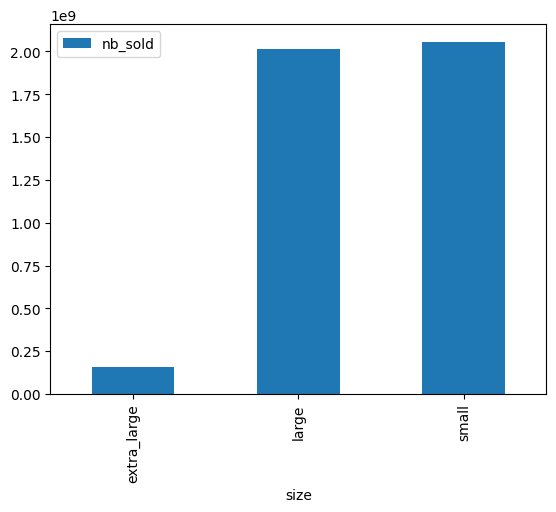

In [83]:
# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()

## Changes in sales over time

                nb_sold
date                   
2015-01-04  27279606.03
2015-01-11  25081927.33
2015-01-18  24961540.48
2015-01-25  24094678.66
2015-02-01  39838734.08
...                 ...
2018-02-25  25434002.74
2018-03-04  26834303.05
2018-03-11  26094044.41
2018-03-18  26030618.97
2018-03-25  27480242.92

[169 rows x 1 columns]


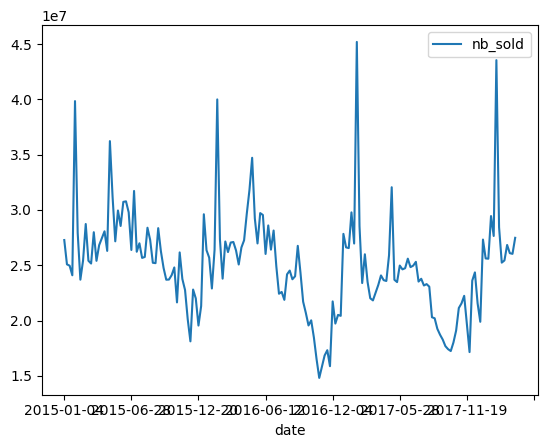

In [95]:
# Get the total number of avocados sold on each date
nb_sold_by_date =avocado.pivot_table(values="nb_sold", index="date", aggfunc=sum)
# nb_sold_by_date =avocado.groupby(by="date")["nb_sold"].sum()
print(nb_sold_by_date)

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind="line")

plt.show()

## Avocado supply and demand

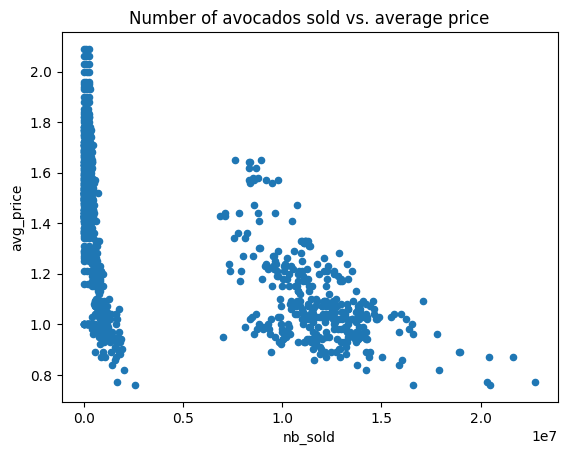

In [99]:
# Scatter plot of avg_price vs. nb_sold with title
avocado.plot(y="avg_price", x="nb_sold", title="Number of avocados sold vs. average price", kind="scatter")

plt.show()

## Price of conventional vs. organic avocados

In [101]:
avocado.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


<AxesSubplot:>

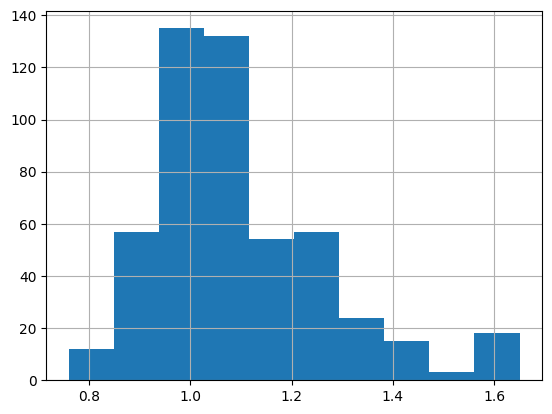

In [102]:
avocado[avocado.type=="conventional"]["avg_price"].hist()

<AxesSubplot:>

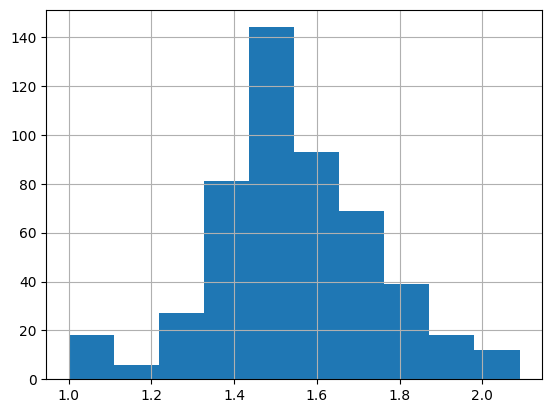

In [103]:
avocado[avocado.type=="organic"]["avg_price"].hist()

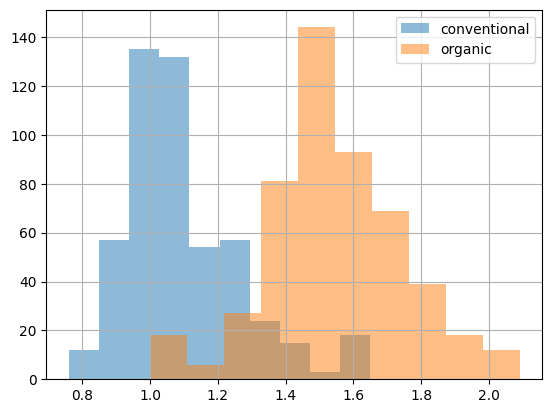

In [105]:
avocado[avocado.type=="conventional"]["avg_price"].hist(bins=20, alpha=0.5)
avocado[avocado.type=="organic"]["avg_price"].hist(bins=20, alpha=0.5)
plt.legend(["conventional", "organic"])
plt.show()

## Missing values

## NaN == Not a Number

## Detecting missing values : .isna()
## Detecting any missing values : .isna().any()
## Counting missing values : .isna().sum()
## Plotting missing values : .isna().sum().plot(kind="bar")

## Removing missing values : .dropna()
## Replacing missing values : .fillna(0)

## Finding missing values

In [111]:
# Check individual values for missing values
# avocado.head()
avocado_2016 = avocado[avocado.year==2016]
# avocado_2016.head()
# avocado_2016.info()

print(avocado_2016.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


In [112]:
print(avocado_2016.isna())

      date   type   year  avg_price   size  nb_sold
52   False  False  False      False  False    False
53   False  False  False      False  False    False
54   False  False  False      False  False    False
55   False  False  False      False  False    False
56   False  False  False      False  False    False
..     ...    ...    ...        ...    ...      ...
944  False  False  False      False  False    False
945  False  False  False      False  False    False
946  False  False  False      False  False    False
947  False  False  False      False  False    False
948  False  False  False      False  False    False

[312 rows x 6 columns]


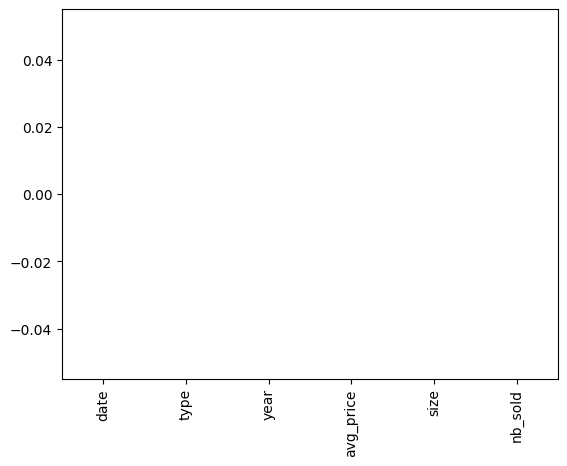

In [113]:
avocado_2016.isna().sum().plot(kind="bar")
plt.show()

## Removing missing values

In [114]:
# Remove rows with missing values
avocado_complete = avocado_2016.dropna()
print(avocado_complete.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


## Replacing missing values

In [117]:
avocado_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 52 to 948
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       312 non-null    object 
 1   type       312 non-null    object 
 2   year       312 non-null    int64  
 3   avg_price  312 non-null    float64
 4   size       312 non-null    object 
 5   nb_sold    312 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 17.1+ KB


In [118]:
# # List the columns with missing values
# cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# # Create histograms showing the distributions cols_with_missing
# avocado_2016[cols_with_missing].hist()

# # Fill in missing values with 0
# avocados_filled = avocados_2016.fillna(0)

# # Create histograms of the filled columns
# avocados_filled[cols_with_missing].hist()

# # Show the plot
# plt.show()

## Creating DataFrame

## From a list of dictionaries => row by row
## list_of_dicts ={} new_dogs=pd.DataFrame(list_of_dicts)

## From a dictionary of lists => column by column
## dict_of_list = { "name":["A", "B"],......} new_dogs=pd.DataFrame(dict_of_lists)

In [120]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


In [121]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17", "2019-12-01"],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


## Reading and writing CSVs

## .read_csv()
## df to csv : .to_csv()

In [122]:
# # From previous steps
# airline_bumping = pd.read_csv("airline_bumping.csv")
# print(airline_bumping.head())
# airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()
# airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

# # Print airline_totals
# print(airline_totals)

In [123]:
# # Create airline_totals_sorted
# airline_totals_sorted = airline_totals.sort_values(by="bumps_per_10k", ascending=False)

# # Print airline_totals_sorted
# print(airline_totals_sorted)

# # Save as airline_totals_sorted.csv
# airline_totals_sorted.to_csv("airline_totals_sorted.csv")